Per vedere come la distribuzione delle velocità varia nel tempo, stampo alcune medie progressive all'interno del primo blocco. Poichè la configurazione poco entropica iniziale cambia velocemente nel tempo, così possiamo "fotografare" le velocità nei primi istanti della simulazione: 

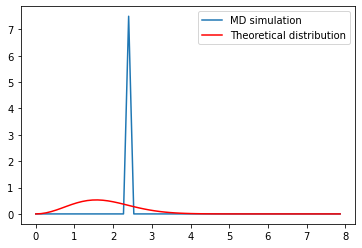

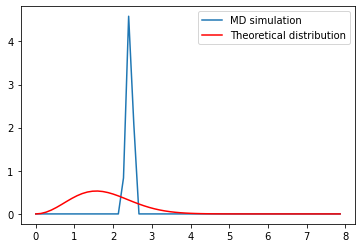

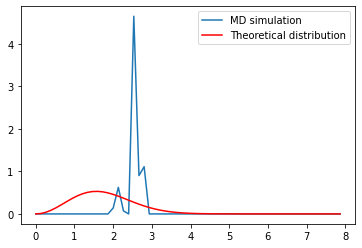

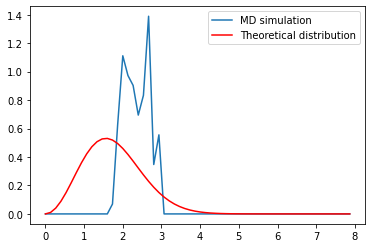

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#parameters of the simulation
rho = 0.05
T = 1.2222
nbins = 60
nblocks = 20


z = np.loadtxt('NSL_SIMULATOR/OUTPUT/POFV/pofv1.dat')
z = z.reshape(-1, 2)


x = z[:,0]
y = z[:,1]

yt = (x*x)*np.exp(-(x*x)/(2.*T))
yt *= (4*math.pi)/((2*math.pi*T)**(3/2))


plt.plot(x, y, label = 'MD simulation')
plt.plot(x, yt, color = 'r', label = 'Theoretical distribution')
plt.legend()
plt.show()

for i in range(3):
    filename = f'NSL_SIMULATOR/OUTPUT/POFV/pofv{i+2}.dat'
    z = np.loadtxt(filename)
    z.reshape(-1, 2)
    y = z[:, 1]
    plt.plot(x, y, label = 'MD simulation')
    plt.plot(x, yt, color = 'r', label = 'Theoretical distribution')
    plt.legend()
    plt.show()
    

è già dunque evidente come la distribuzione deltiforme si stia "allargando" a diventare la distribuzione di Maxwell-Boltzmann. Per confermare questa supposizione, stampiamo la media della distribuzione alla fine della simulazione: 

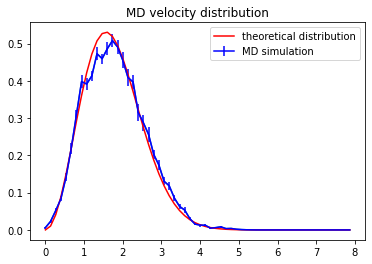

In [10]:
#load data 
z = np.loadtxt('NSL_SIMULATOR/OUTPUT/pofv.dat')
z.reshape(-1, 3)

y = z[:,1]
err = z[:,2]

#print data and expected values 
plt.plot(x,y)
plt.errorbar(x, y, yerr = err, label = 'MD simulation', color = 'b')
plt.plot(x, yt, label = 'theoretical distribution', color = 'r')
plt.legend()
plt.title('MD velocity distribution')
plt.show()

Per verificare la compatibilità della distribuzione, eseguo un test statistico, come il test del $\chi^2$: Un passaggio delicato però e il determinare la temperatura $T$ rispetto alla quale eseguire il test statistico: questa non può certamente essere la mia temperatura iniziale, poichè il sistema aumentando la sua energia potenziale si raffredda. Posso invece cercare quale è la temperatura che minimizza il $\chi^2$ rispetto alla distribuzione trovata con la mia soluzione (cioè applico il metodo dei minimi quadrati).  

In [11]:
chi=np.zeros(100)
count =0

#check where err=0
valid = err != 0
x_valid = x[valid]
y_valid = y[valid]
err_valid = err[valid]

#generate 100 T values in [1, 1.5]
T = np.linspace(1, 1.5, 100)

yt = np.zeros((len(T), len(x_valid)))

#compute theoretical distribution for diffrent T
for i, t in enumerate(T):
    yt[i] = (x_valid**2) * np.exp(-x_valid**2 / (2 * t))
    yt[i] *= (4 * math.pi) / ((2 * math.pi * t)**(3/2))

#compute chi for every T
chi = np.sum(((yt - y_valid) / err_valid)**2, axis=1)

#find the minimum of Chi
chi_best = np.min(chi)
T_best = T[np.argmin(chi)]

#print results 
print(f"Temperatura finale del sistema: {T_best:.4f}")
print(f"Chi quadro minimo: {chi_best:.4f}")

Temperatura finale del sistema: 1.2222
Chi quadro minimo: 179.7903


Il valore del $\chi^2$ trovato è grande, ma comunque statisticamente compatibile con la distribuzione di Maxwell-Boltzmann ($N_{bins} = 60$)

Per tutta la simulazione, sono stati usati $N_{blocks}=20$, da $2 \cdot 10^3$ step ciascuno.